<a href="https://colab.research.google.com/github/Tabook22/ComputerVision/blob/main/image_filter_agverage_median_100timesfiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This exercise is used to demonstrate the effect of both Average filtering and Median filtering on an image.

Adding Noise.
The np.random.randint(-10, 11, base_image.shape) part of the code generates random integers between -10 and 10 for
each pixel in the base image, effectively introducing noise. This randomness can make some pixels darker or lighter
than they originally were, creating a noisy effect.


In [1]:
#Install the needed libraries
!pip install numpy matplotlib scipy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, median_filter
from matplotlib.widgets import Button
import matplotlib.image as mpimg
from google.colab import files
import io

In [57]:
#upload the image
# when you upload a file using the file upload widget, the file is stored in a dictionary with the file name as the key and the file data as the value.
from google.colab import files
# Extracting the filename from the uploaded files
uploaded = files.upload()
img_path = next(iter(uploaded))

Saving author 2.png to author 2 (5).png


In [58]:
# Reading the image using the filename
img = mpimg.imread(io.BytesIO(uploaded[img_path]))
if img.ndim == 3:
# Convert to grayscale if it's a color image
  img = np.mean(img, axis=2)

In [59]:
noise = np.random.randint(-1, 1, img.shape)
noisy_image = img + noise
#this function returns a new image with noise
addnoise=np.clip(noisy_image, 0, 255)  # Clipping to keep pixel values between 0 and 255

In [60]:
average_filtered = uniform_filter(addnoise, size=3) # appling Average filter of size 3x3
median_filtered = median_filter(addnoise, size=3) # appling Median filter of size 3x3

'''
#here i repeted the filttering 100 times
for i in range(100):
  average_filtered = uniform_filter(average_filtered, size=3) # appling Average filter of size 3x3
  median_filtered = median_filter(median_filtered, size=3) # appling Median filter of size 3x3
'''

In [61]:
images = [img, addnoise, average_filtered, median_filtered]
titles=["Original Image", "Noisy Image", "Average Filtered", "Median Filtered"]


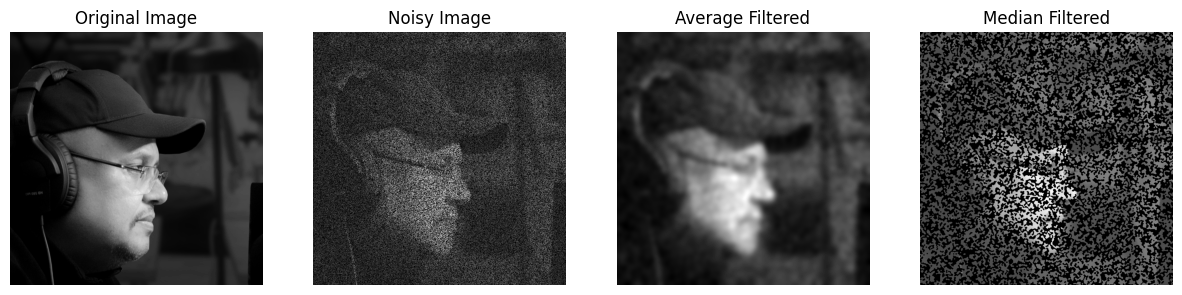

In [62]:
plt.figure(figsize=(15, 5))
for i, (img, title) in enumerate(zip(images, titles)):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.axis('off')
plt.show()